In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
matches = pd.read_csv('C:/Users/Hp/Desktop/WPL/matches.csv')
deliveries = pd.read_csv('C:/Users/Hp/Desktop/WPL/deliveries.csv')

In [3]:
all_matches = matches[(matches['team1'].isin(['Chennai Super Kings', 'Mumbai Indians'])) & (matches['team2'].isin(['Chennai Super Kings', 'Mumbai Indians']))]

In [4]:
data = pd.merge(matches, deliveries, how = "inner", left_on = 'id', right_on = 'match_id')

In [5]:
sub_data = data[(data['team1'].isin(['Chennai Super Kings', 'Mumbai Indians'])) & (data['team2'].isin(['Chennai Super Kings', 'Mumbai Indians']))]

### Who will win the match?

In [6]:
all_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
66,67,2008,Chennai,4/23/2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
95,96,2008,Mumbai,5/14/2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
117,118,2009,Cape Town,4/18/2009,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
161,162,2009,Port Elizabeth,5/16/2009,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
193,194,2010,Mumbai,3/25/2010,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN


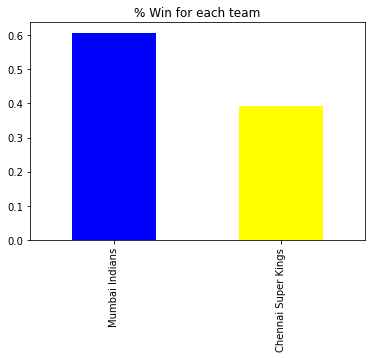

In [7]:
all_matches['winner'].value_counts(normalize=True).plot.bar(title='% Win for each team', color = ['Blue', 'Yellow'])

In [8]:
all_matches.groupby('venue')['winner'].value_counts()

venue                                    winner             
Brabourne Stadium                        Chennai Super Kings    1
                                         Mumbai Indians         1
Dr DY Patil Sports Academy               Chennai Super Kings    1
Dubai International Cricket Stadium      Chennai Super Kings    1
Eden Gardens                             Mumbai Indians         2
Feroz Shah Kotla                         Chennai Super Kings    1
M Chinnaswamy Stadium                    Chennai Super Kings    1
M. A. Chidambaram Stadium                Mumbai Indians         2
MA Chidambaram Stadium, Chepauk          Mumbai Indians         3
                                         Chennai Super Kings    2
Maharashtra Cricket Association Stadium  Mumbai Indians         1
Newlands                                 Mumbai Indians         1
Rajiv Gandhi Intl. Cricket Stadium       Mumbai Indians         1
St George's Park                         Chennai Super Kings    1
Wankhede Stadiu

In [9]:
all_matches.groupby('venue')['winner', 'win_by_runs', 'win_by_wickets'].max()

,winner,win_by_runs,win_by_wickets
venue,,,
Brabourne Stadium,Mumbai Indians,0,7
Dr DY Patil Sports Academy,Chennai Super Kings,22,0
Dubai International Cricket Stadium,Chennai Super Kings,0,7
Eden Gardens,Mumbai Indians,41,0
Feroz Shah Kotla,Chennai Super Kings,48,0
M Chinnaswamy Stadium,Chennai Super Kings,38,0
M. A. Chidambaram Stadium,Mumbai Indians,46,6
"MA Chidambaram Stadium, Chepauk",Mumbai Indians,24,8
Maharashtra Cricket Association Stadium,Mumbai Indians,0,8


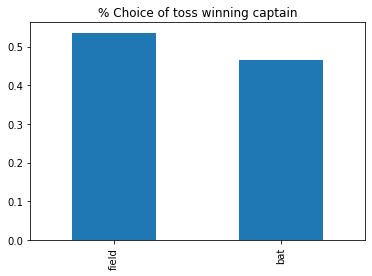

In [10]:
all_matches['toss_decision'].value_counts(normalize=True).plot.bar(title='% Choice of toss winning captain')

In [11]:
round(all_matches.groupby('toss_winner')['toss_decision'].value_counts(normalize=True), 2)*100

toss_winner          toss_decision
Chennai Super Kings  field            62.0
                     bat              38.0
Mumbai Indians       bat              53.0
                     field            47.0
Name: toss_decision, dtype: float64

* CSK likes to field first most of the time and chase the target.

In [12]:
round(all_matches.groupby(['toss_decision', 'toss_winner'])['winner'].value_counts(normalize=True),2)*100

toss_decision  toss_winner          winner             
bat            Chennai Super Kings  Chennai Super Kings    60.0
                                    Mumbai Indians         40.0
               Mumbai Indians       Mumbai Indians         62.0
                                    Chennai Super Kings    38.0
field          Chennai Super Kings  Mumbai Indians         62.0
                                    Chennai Super Kings    38.0
               Mumbai Indians       Mumbai Indians         71.0
                                    Chennai Super Kings    29.0
Name: winner, dtype: float64

* MI when chase the target have 71% chances of winning the match.

In [13]:
all_matches[all_matches['season']>2015].groupby('winner')['player_of_match'].value_counts()

winner               player_of_match
Chennai Super Kings  DJ Bravo           1
Mumbai Indians       RG Sharma          2
                     AS Yadav           1
                     HH Pandya          1
                     JJ Bumrah          1
Name: player_of_match, dtype: int64

In [14]:
sub_data1 = sub_data[(sub_data['player_of_match'] == 'RG Sharma') & (sub_data['batsman']=='RG Sharma')]

In [15]:
sub_data1.groupby('match_id')['batsman_runs'].sum()

match_id
576      50
7920     59
11335    67
Name: batsman_runs, dtype: int64

### How many runs will Quinton De Kock score off boundaries in the first 10 balls he faces? Id he dosen't face 10 balls and gets out before , the the number of runs he scored off boundaries until the point he got out?

In [28]:
sub_data2 = sub_data[(sub_data['batsman'] == 'Q de Kock')].sort_values(['match_id','over', 'ball']).groupby('match_id').head(10)

In [17]:
dummy = pd.DataFrame(sub_data2.groupby('match_id')['ball'].count())

In [18]:
index = dummy[dummy['ball'] == 10].index

In [19]:
runs_by_bound = sub_data2[(sub_data2['match_id'].isin(index)) & (sub_data2['batsman_runs'].isin([4,6]))].groupby('match_id')['batsman_runs'].sum()

In [20]:
tot_runs = sub_data2[(sub_data2['match_id'].isin(index))].groupby('match_id')['batsman_runs'].sum()

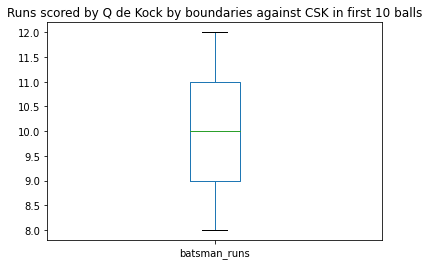

In [47]:
runs_by_bound.plot.box(title='Runs scored by Q de Kock by boundaries against CSK in first 10 balls')

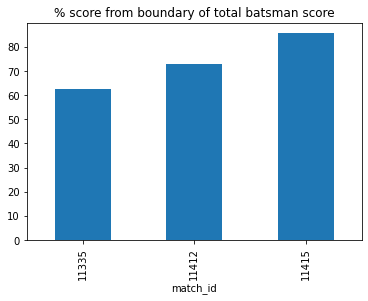

In [21]:
round((runs_by_bound/tot_runs)*100, 2).plot.bar(title="% score from boundary of total batsman score")

In [52]:
sub_data2[(sub_data2['match_id'] == (dummy[dummy['ball'] == 7].index[0])) & (sub_data2['batsman_runs'].isin([4,6]))].groupby('match_id')['batsman_runs'].sum()/sub_data2[sub_data2['match_id'] == (dummy[dummy['ball'] < 10].index[0])].groupby('match_id')['batsman_runs'].sum()

match_id
11151    0.8
Name: batsman_runs, dtype: float64

In [29]:
sub_data3 = data[(data['batsman'] == 'Q de Kock')].sort_values(['match_id','over', 'ball']).groupby('match_id').head(10)

In [30]:
dummy1 = pd.DataFrame(sub_data3.groupby('match_id')['ball'].count())

In [32]:
index = dummy1[dummy1['ball'] == 10].index

In [33]:
runs_by_bound1 = sub_data3[(sub_data3['match_id'].isin(index)) & (sub_data3['batsman_runs'].isin([4,6]))].groupby('match_id')['batsman_runs'].sum()

In [34]:
tot_runs1 = sub_data3[(sub_data3['match_id'].isin(index))].groupby('match_id')['batsman_runs'].sum()

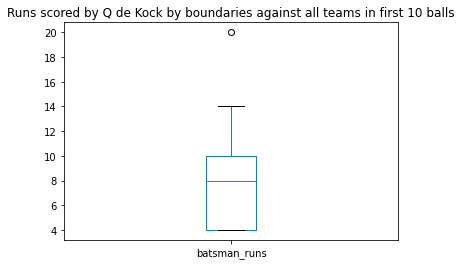

In [46]:
runs_by_bound1.plot.box(title='Runs scored by Q de Kock by boundaries against all teams in first 10 balls')

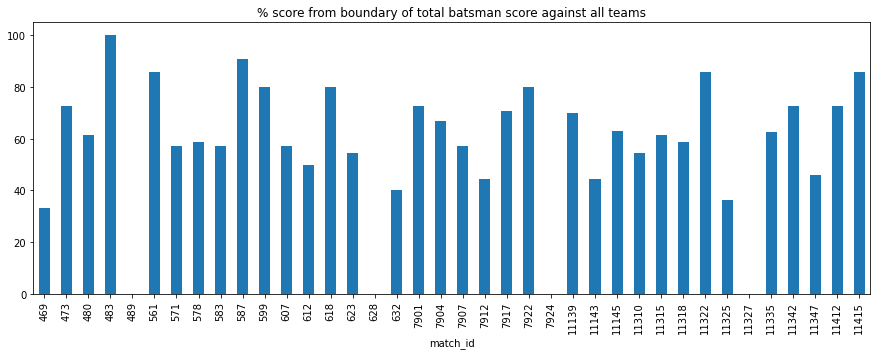

In [39]:
round((runs_by_bound1/tot_runs1)*100, 2).plot.bar(title="% score from boundary of total batsman score against all teams", figsize=(15,5))

In [44]:
sub_data3[(sub_data3['match_id'] == (dummy1[dummy1['ball'] <= 7].index[0]))].groupby('match_id')['batsman_runs'].sum()

match_id
405    0
Name: batsman_runs, dtype: int64

In [58]:
index1 = (dummy1[dummy1['ball']<10]).index

In [62]:
sub_data3[(sub_data3['match_id'].isin(index1)) & (sub_data3['batsman_runs'].isin([4,6]))].groupby('match_id')['batsman_runs'].value_counts()

match_id  batsman_runs
414       4               1
485       4               2
495       4               1
593       4               2
7896      4               1
11151     4               1
Name: batsman_runs, dtype: int64

### Which MI bowlers will have the best dot balls to  total bowled ratio?

In [68]:
sub_data4 = sub_data[(sub_data['bowling_team'] == 'Mumbai Indians') & (sub_data['season']>2015) & (sub_data['total_runs'] == 0)]

In [71]:
sub_data5 = sub_data[(sub_data['bowling_team'] == 'Mumbai Indians') & (sub_data['season']>2015)]

In [77]:
round((sub_data4.groupby(['match_id', 'bowler'])['ball'].count()/sub_data5.groupby(['match_id', 'bowler'])['ball'].count())*100, 2)

match_id  bowler           
7894      HH Pandya            44.44
          JJ Bumrah            40.00
          M Markande           41.67
          MJ McClenaghan       20.00
          Mustafizur Rahman    30.43
7920      BCJ Cutting          14.29
          HH Pandya            29.17
          JJ Bumrah            44.00
          KH Pandya            36.00
          M Markande           21.05
          MJ McClenaghan       41.67
11151     HH Pandya            52.00
          J Behrendorff        56.00
          JJ Bumrah            44.00
          KH Pandya            35.71
          RD Chahar            38.46
          SL Malinga           52.00
11335     A Roy                26.67
          HH Pandya            35.71
          JJ Bumrah            57.89
          KH Pandya            66.67
          RD Chahar            29.17
          SL Malinga           36.36
11412     HH Pandya            25.00
          J Yadav              42.11
          JJ Bumrah            24.00
          

In [97]:
sub_data6 = data[(data['bowler'].isin(['TA Boult', 'JJ Bumrah', 'HH Pandya', 'KH Pandya', 'NM Coulter-Nile', 'RD Chahar'])) & (data['season']>2015)]

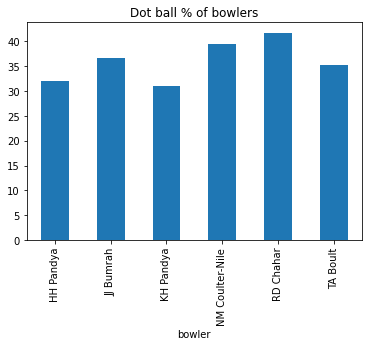

In [98]:
round((sub_data6[sub_data6['total_runs'] == 0].groupby(['bowler'])['ball'].count()/sub_data6.groupby(['bowler'])['ball'].count())*100,2).plot.bar(title='Dot ball % of bowlers')

In [99]:
round((sub_data6[sub_data6['total_runs'] == 0].groupby(['season', 'bowler'])['ball'].count()/sub_data6.groupby(['season', 'bowler'])['ball'].count())*100,2)

season  bowler         
2016    HH Pandya          27.36
        JJ Bumrah          33.54
        KH Pandya          27.32
        NM Coulter-Nile    39.78
        TA Boult           42.31
2017    HH Pandya          27.78
        JJ Bumrah          33.24
        KH Pandya          29.67
        NM Coulter-Nile    39.33
        RD Chahar          34.78
        TA Boult           35.81
2018    HH Pandya          34.81
        JJ Bumrah          38.44
        KH Pandya          33.33
        TA Boult           33.94
2019    HH Pandya          33.46
        JJ Bumrah          40.94
        KH Pandya          32.62
        RD Chahar          42.86
        TA Boult           36.67
Name: ball, dtype: float64

In [100]:
round((sub_data6[sub_data6['total_runs'] == 0].groupby(['batting_team','bowler'])['ball'].count()/sub_data6.groupby(['batting_team','bowler'])['ball'].count())*100,2)

batting_team                 bowler         
Chennai Super Kings          HH Pandya          40.37
                             JJ Bumrah          41.96
                             KH Pandya          47.47
                             RD Chahar          44.71
                             TA Boult           43.30
Delhi Capitals               HH Pandya          31.13
                             JJ Bumrah          37.22
                             KH Pandya          31.31
                             NM Coulter-Nile    46.94
                             RD Chahar          57.69
Gujarat Lions                HH Pandya          33.33
                             JJ Bumrah          29.46
                             KH Pandya          36.71
                             NM Coulter-Nile    28.57
                             RD Chahar          44.44
                             TA Boult           37.25
Kings XI Punjab              HH Pandya          21.43
                             JJ Bumra

### How many such overs will be there in a match where a 6 and 4 are scored in the same over?

match_id  over
67        1       15
          2       12
          3       12
          4       12
          5       12
          6       14
          7       13
          8       13
          9       12
          10      12
          11      15
          12      13
          13      13
          14      12
          15      12
          16      13
          17      12
          18      12
          19      13
          20      13
Name: ball, dtype: int64

In [138]:
def Check(df):
    
    if (4 in df.total_runs.unique()) and (6 in df.total_runs.unique()): 
        return 1

In [145]:
sub_data.groupby(['match_id','inning','over','ball'])['total_runs'].unique()

match_id  inning  over  ball
67        1       1     1       [1]
                        2       [0]
                        3       [0]
                        4       [0]
                        5       [4]
                               ... 
11415     2       20    2       [1]
                        3       [2]
                        4       [1]
                        5       [2]
                        6       [0]
Name: total_runs, Length: 6811, dtype: object

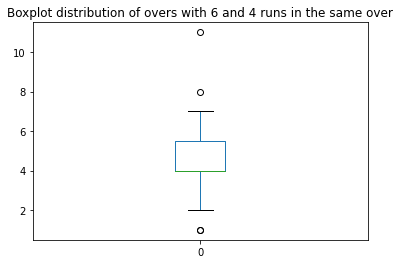

In [149]:
pd.DataFrame(sub_data.groupby(['match_id','inning','over']).apply(Check)).groupby(['match_id'])[0].value_counts().plot.box(title='Boxplot distribution of overs with 6 and 4 runs in the same over')

In [154]:
dummy = pd.DataFrame(sub_data.groupby(['bowler','over']).apply(Check))

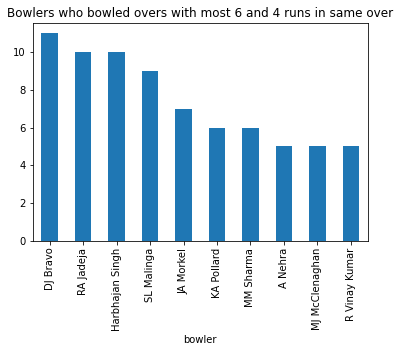

In [160]:
dummy[dummy[0]==1].groupby('bowler')[0].count().sort_values(ascending=False).head(10).plot.bar(title='Bowlers who bowled overs with most 6 and 4 runs in same over')

### Bowler Lethality Score(BLS)

In [224]:
sub_data7 = sub_data[sub_data['season']>2015]

In [225]:
sub_data7.shape

(1465, 40)

In [226]:
dummy1 = pd.DataFrame(sub_data7.groupby(['match_id','bowler'])['over'].unique())

In [227]:
dummy1 = pd.DataFrame(dummy1['over'].apply(lambda x : len(x)))

In [228]:
hire_index = dummy1[dummy1['over'] == 1].index

In [229]:
for i in hire_index:
    sub_data7.drop((sub_data7[(sub_data7['match_id']==i[0]) & (sub_data7['bowler']==i[1])]).index, inplace=True)

In [243]:
player_dismissed = sub_data7.groupby(['match_id', 'bowler'])['player_dismissed'].count()

In [245]:
dot_balls = sub_data7[sub_data7['total_runs']==0].groupby(['match_id', 'bowler'])['ball'].count()

In [253]:
boundary_runs = sub_data7[sub_data7['total_runs'].isin([4,6])].groupby(['match_id','bowler'])['total_runs'].sum()

In [259]:
no_boundaries = sub_data7[sub_data7['total_runs'].isin([4,6])].groupby(['match_id','bowler'])['total_runs'].count()

In [262]:
ball_bowled = sub_data7.groupby(['match_id','bowler'])['ball'].count()

In [267]:
BLS = (((player_dismissed + dot_balls) - (boundary_runs / no_boundaries))/ball_bowled)

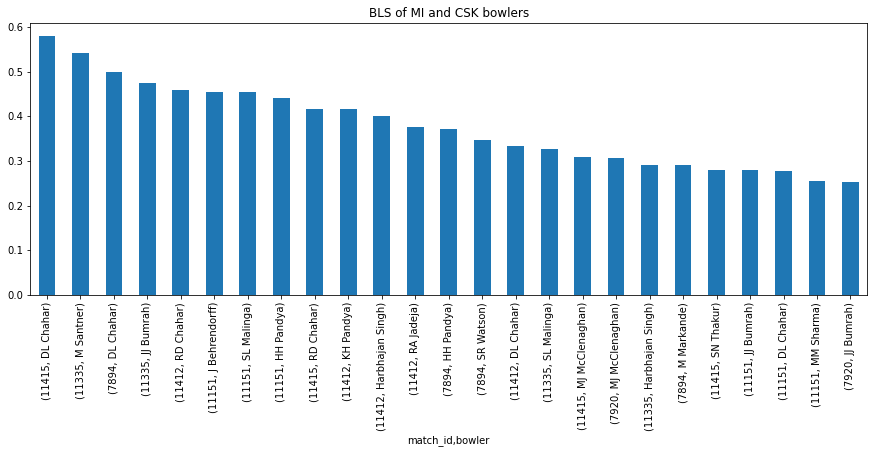

In [275]:
BLS.sort_values(ascending=False).head(25).plot.bar(title='BLS of MI and CSK bowlers', figsize=(15,5))